In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from pandas import *
from pylab import *
df = pd.read_csv('playerinfo.csv', encoding = 'utf8',index_col=0)
df['sign']=df['sign'].str.replace("U23","reserve")
df['sign']=df['sign'].str.replace("U21","reserve")
df['sign']=df['sign'].str.replace("U18","reserve")

In [2]:
df.rename(columns={'current':'current club'}, inplace=True)
df.rename(columns={'sign':'signed from'}, inplace=True)
df[['birth','age']] = df['birth'].str.split('(', expand=True)
df['age'] = df['age'].str.replace(")","")
df['age']=[int(i) for i in df['age']]
df = df[['current club','signed from','number','name','position','birth','age','nation','height','foot','join','contract','value']]
df.head(10)

,current club,signed from,number,name,position,birth,age,nation,height,foot,join,contract,value
0,Manchester City,SL Benfica,31,Ederson,Goalkeeper,"Aug 17, 1993",25,Brazil,"1,88 m",left,"Jul 1, 2017",30.06.2025,£54.00m
1,Manchester City,FC Barcelona,1,Claudio Bravo,Goalkeeper,"Apr 13, 1983",35,Chile,"1,84 m",right,"Aug 25, 2016",30.06.2020,£2.25m
2,Manchester City,Manchester City reserve,49,Arijanet Muric,Goalkeeper,"Nov 7, 1998",20,Kosovo,"1,98 m",right,"Jul 1, 2018",30.06.2021,£900k
3,Manchester City,Everton FC,5,John Stones,Centre-Back,"May 28, 1994",24,England,"1,88 m",right,"Aug 9, 2016",30.06.2022,£54.00m
4,Manchester City,Athletic Bilbao,14,Aymeric Laporte,Centre-Back,"May 27, 1994",24,France,"1,91 m",left,"Jan 30, 2018",30.06.2025,£54.00m
5,Manchester City,Valencia CF,30,Nicolás Otamendi,Centre-Back,"Feb 12, 1988",31,Argentina,"1,83 m",right,"Aug 20, 2015",30.06.2022,£27.00m
6,Manchester City,Hamburger SV,4,Vincent Kompany,Centre-Back,"Apr 10, 1986",32,Belgium,"1,90 m",right,"Aug 22, 2008",30.06.2019,£9.00m
7,Manchester City,FC Porto,15,Eliaquim Mangala,Centre-Back,"Feb 13, 1991",28,France,"1,87 m",left,"Aug 11, 2014",30.06.2020,£9.00m
8,Manchester City,PEC Zwolle,34,Philippe Sandler,Centre-Back,"Feb 10, 1997",22,Netherlands,"1,90 m",right,"Jul 31, 2018",30.06.2022,£2.25m
9,Manchester City,AS Monaco,22,Benjamin Mendy,Left-Back,"Jul 17, 1994",24,France,"1,85 m",left,"Jul 24, 2017",30.06.2023,£36.00m


In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches
%matplotlib inline

In [4]:
liv = df[df['current club'] == 'Liverpool FC']
liv = liv.reset_index()

G=nx.DiGraph()
for i in range(len(liv)):
    if (liv['signed from'][i], liv['current club'][i]) in G.edges():
        data = G.get_edge_data(liv['signed from'][i], liv['current club'][i])
        G.add_edge(liv['signed from'][i], liv['current club'][i], weight=data['weight']+1)
    else:
        G.add_edge(liv['signed from'][i], liv['current club'][i], weight=1)
print(G.edges(data=True))

[('AS Roma', 'Liverpool FC', {'weight': 2}), ('Sunderland AFC', 'Liverpool FC', {'weight': 2}), ('Southampton FC', 'Liverpool FC', {'weight': 4}), ('Charlton Athletic', 'Liverpool FC', {'weight': 1}), ('FC Schalke 04', 'Liverpool FC', {'weight': 1}), ('Hull City', 'Liverpool FC', {'weight': 1}), ('Sevilla FC', 'Liverpool FC', {'weight': 1}), ('Liverpool FC reserve', 'Liverpool FC', {'weight': 3}), ('AS Monaco', 'Liverpool FC', {'weight': 1}), ('RB Leipzig', 'Liverpool FC', {'weight': 1}), ('Newcastle United', 'Liverpool FC', {'weight': 1}), ('Manchester City', 'Liverpool FC', {'weight': 1}), ('Arsenal FC', 'Liverpool FC', {'weight': 1}), ('Stoke City', 'Liverpool FC', {'weight': 1}), ('TSG 1899 Hoffenheim', 'Liverpool FC', {'weight': 1}), ('Chelsea FC', 'Liverpool FC', {'weight': 1}), ('LOSC Lille', 'Liverpool FC', {'weight': 1})]


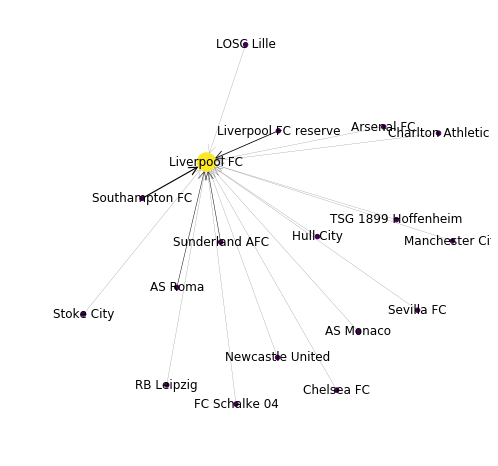

In [5]:
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]
nodesize = dict(nx.degree(G)).values()
plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
nx.draw(G,node_size=[i*20 for i in nodesize],node_color= [i*20 for i in nodesize],width=[(i-0.6)/3 for i in edgewidth],arrowstyle='->',arrowsize=20,with_labels=True,fontsize=3)

In [9]:
liv = df[df['current club'] == 'Fulham FC']
liv = liv.reset_index()

G=nx.DiGraph()
for i in range(len(liv)):
    if (liv['signed from'][i], liv['current club'][i]) in G.edges():
        data = G.get_edge_data(liv['signed from'][i], liv['current club'][i])
        G.add_edge(liv['signed from'][i], liv['current club'][i], weight=data['weight']+1)
    else:
        G.add_edge(liv['signed from'][i], liv['current club'][i], weight=1)
print(G.edges(data=True))

[('Sevilla FC', 'Fulham FC', {'weight': 1}), ('Besiktas JK', 'Fulham FC', {'weight': 2}), ('Fulham FC reserve', 'Fulham FC', {'weight': 3}), ('Swansea City', 'Fulham FC', {'weight': 1}), ('Arsenal FC', 'Fulham FC', {'weight': 1}), ('OGC Nice', 'Fulham FC', {'weight': 2}), ('Bolton Wanderers', 'Fulham FC', {'weight': 1}), ('CD Lugo', 'Fulham FC', {'weight': 1}), ('Bristol City', 'Fulham FC', {'weight': 1}), ('Manchester United', 'Fulham FC', {'weight': 1}), ('Middlesbrough FC', 'Fulham FC', {'weight': 1}), ('KSC Lokeren', 'Fulham FC', {'weight': 1}), ('Olympique Marseille', 'Fulham FC', {'weight': 1}), ('Wolverhampton Wanderers', 'Fulham FC', {'weight': 1}), ('TSG 1899 Hoffenheim', 'Fulham FC', {'weight': 1}), ('Standard Liège', 'Fulham FC', {'weight': 1}), ('Blackburn Rovers', 'Fulham FC', {'weight': 1}), ('KRC Genk', 'Fulham FC', {'weight': 1}), ('Borussia Dortmund', 'Fulham FC', {'weight': 1}), ('SC Bastia', 'Fulham FC', {'weight': 1}), ('Liverpool FC', 'Fulham FC', {'weight': 1}), (

In [10]:
liv

,index,current club,signed from,number,name,position,birth,age,nation,height,foot,join,contract,value
0,250,Fulham FC,Sevilla FC,25,Sergio Rico,Goalkeeper,"Sep 1, 1993",25,Spain,"1,94 m",right,"Aug 9, 2018",30.06.2019,£10.80m
1,251,Fulham FC,Besiktas JK,31,Fabri,Goalkeeper,"Dec 31, 1987",31,Spain,"1,84 m",-,"Jul 24, 2018",30.06.2021,£4.50m
2,252,Fulham FC,Fulham FC reserve,1,Marcus Bettinelli,Goalkeeper,"May 24, 1992",26,England,"1,94 m",right,"Jul 1, 2012",30.06.2021,£3.60m
3,253,Fulham FC,Swansea City,26,Alfie Mawson,Centre-Back,"Jan 19, 1994",25,England,"1,88 m",left,"Aug 2, 2018",30.06.2022,£13.50m
4,254,Fulham FC,Arsenal FC,5,Calum Chambers,Centre-Back,"Jan 20, 1995",24,England,"1,83 m",right,"Aug 7, 2018",31.05.2019,£12.60m
5,255,Fulham FC,OGC Nice,20,Maxime Le Marchand,Centre-Back,"Oct 11, 1989",29,France,"1,85 m",left,"Jul 12, 2018",30.06.2022,£4.50m
6,256,Fulham FC,Bolton Wanderers,13,Tim Ream,Centre-Back,"Oct 5, 1987",31,United States,"1,86 m",left,"Aug 20, 2015",30.06.2020,£3.15m
7,257,Fulham FC,CD Lugo,-,Marcelo Djaló,Centre-Back,"Oct 8, 1993",25,Guinea-Bissau,"1,93 m",right,"Jul 3, 2017",30.06.2020,£450k
8,258,Fulham FC,Bristol City,23,Joe Bryan,Left-Back,"Sep 17, 1993",25,England,"1,73 m",left,"Aug 9, 2018",30.06.2022,£5.40m
9,259,Fulham FC,Manchester United,21,Tim Fosu-Mensah,Right-Back,"Jan 2, 1998",21,Netherlands,"1,90 m",right,"Aug 9, 2018",31.05.2019,£6.30m


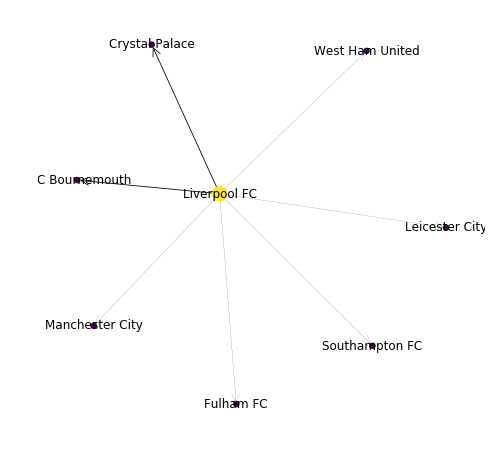

In [7]:
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]
nodesize = dict(nx.degree(G)).values()
plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
nx.draw(G,node_size=[i*30 for i in nodesize],node_color= [i*20 for i in nodesize],width=[(i-0.6)/3 for i in edgewidth],arrowstyle='->',arrowsize=20,with_labels=True,fontsize=3)

In [8]:
TF=nx.DiGraph()
for i in range(len(df)): 
    if (df['signed from'][i], df['current club'][i]) in TF.edges():
        data = TF.get_edge_data(df['signed from'][i], df['current club'][i])
        TF.add_edge(df['signed from'][i], df['current club'][i], weight=data['weight']+1)
    else:
        TF.add_edge(df['signed from'][i], df['current club'][i], weight=1)

In [9]:
nodesize = dict(TF.in_degree()).values()
edgewidth = [d['weight'] for (u,v,d) in TF.edges(data=True)]

In [10]:
dict(TF.in_degree())

{'SL Benfica': 0,
 'Manchester City': 22,
 'FC Barcelona': 0,
 'Manchester City reserve': 0,
 'Everton FC': 0,
 'Athletic Bilbao': 0,
 'Valencia CF': 0,
 'Hamburger SV': 0,
 'FC Porto': 0,
 'PEC Zwolle': 0,
 'AS Monaco': 0,
 'FK Ufa': 0,
 'Tottenham Hotspur': 16,
 'Real Madrid': 0,
 'Shakhtar Donetsk': 0,
 'Borussia Dortmund': 0,
 'Aston Villa': 0,
 'VfL Wolfsburg': 0,
 'FC Schalke 04': 0,
 'Liverpool FC': 17,
 'Leicester City': 21,
 'Atlético Madrid': 0,
 'Sociedade Esportiva Palmeiras': 0,
 'AS Roma': 0,
 'Sunderland AFC': 0,
 'Southampton FC': 16,
 'Charlton Athletic': 0,
 'Hull City': 0,
 'Sevilla FC': 0,
 'Liverpool FC reserve': 0,
 'RB Leipzig': 0,
 'Newcastle United': 20,
 'Arsenal FC': 20,
 'Stoke City': 0,
 'TSG 1899 Hoffenheim': 0,
 'Chelsea FC': 21,
 'LOSC Lille': 0,
 'Chelsea FC reserve': 0,
 'Huddersfield Town': 22,
 'Paris Saint-Germain': 0,
 'Bolton Wanderers': 0,
 'Exeter City reserve': 0,
 'ACF Fiorentina': 0,
 'Olympique Marseille': 0,
 'Torino FC': 0,
 'SSC Napoli': 

D:\Python\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


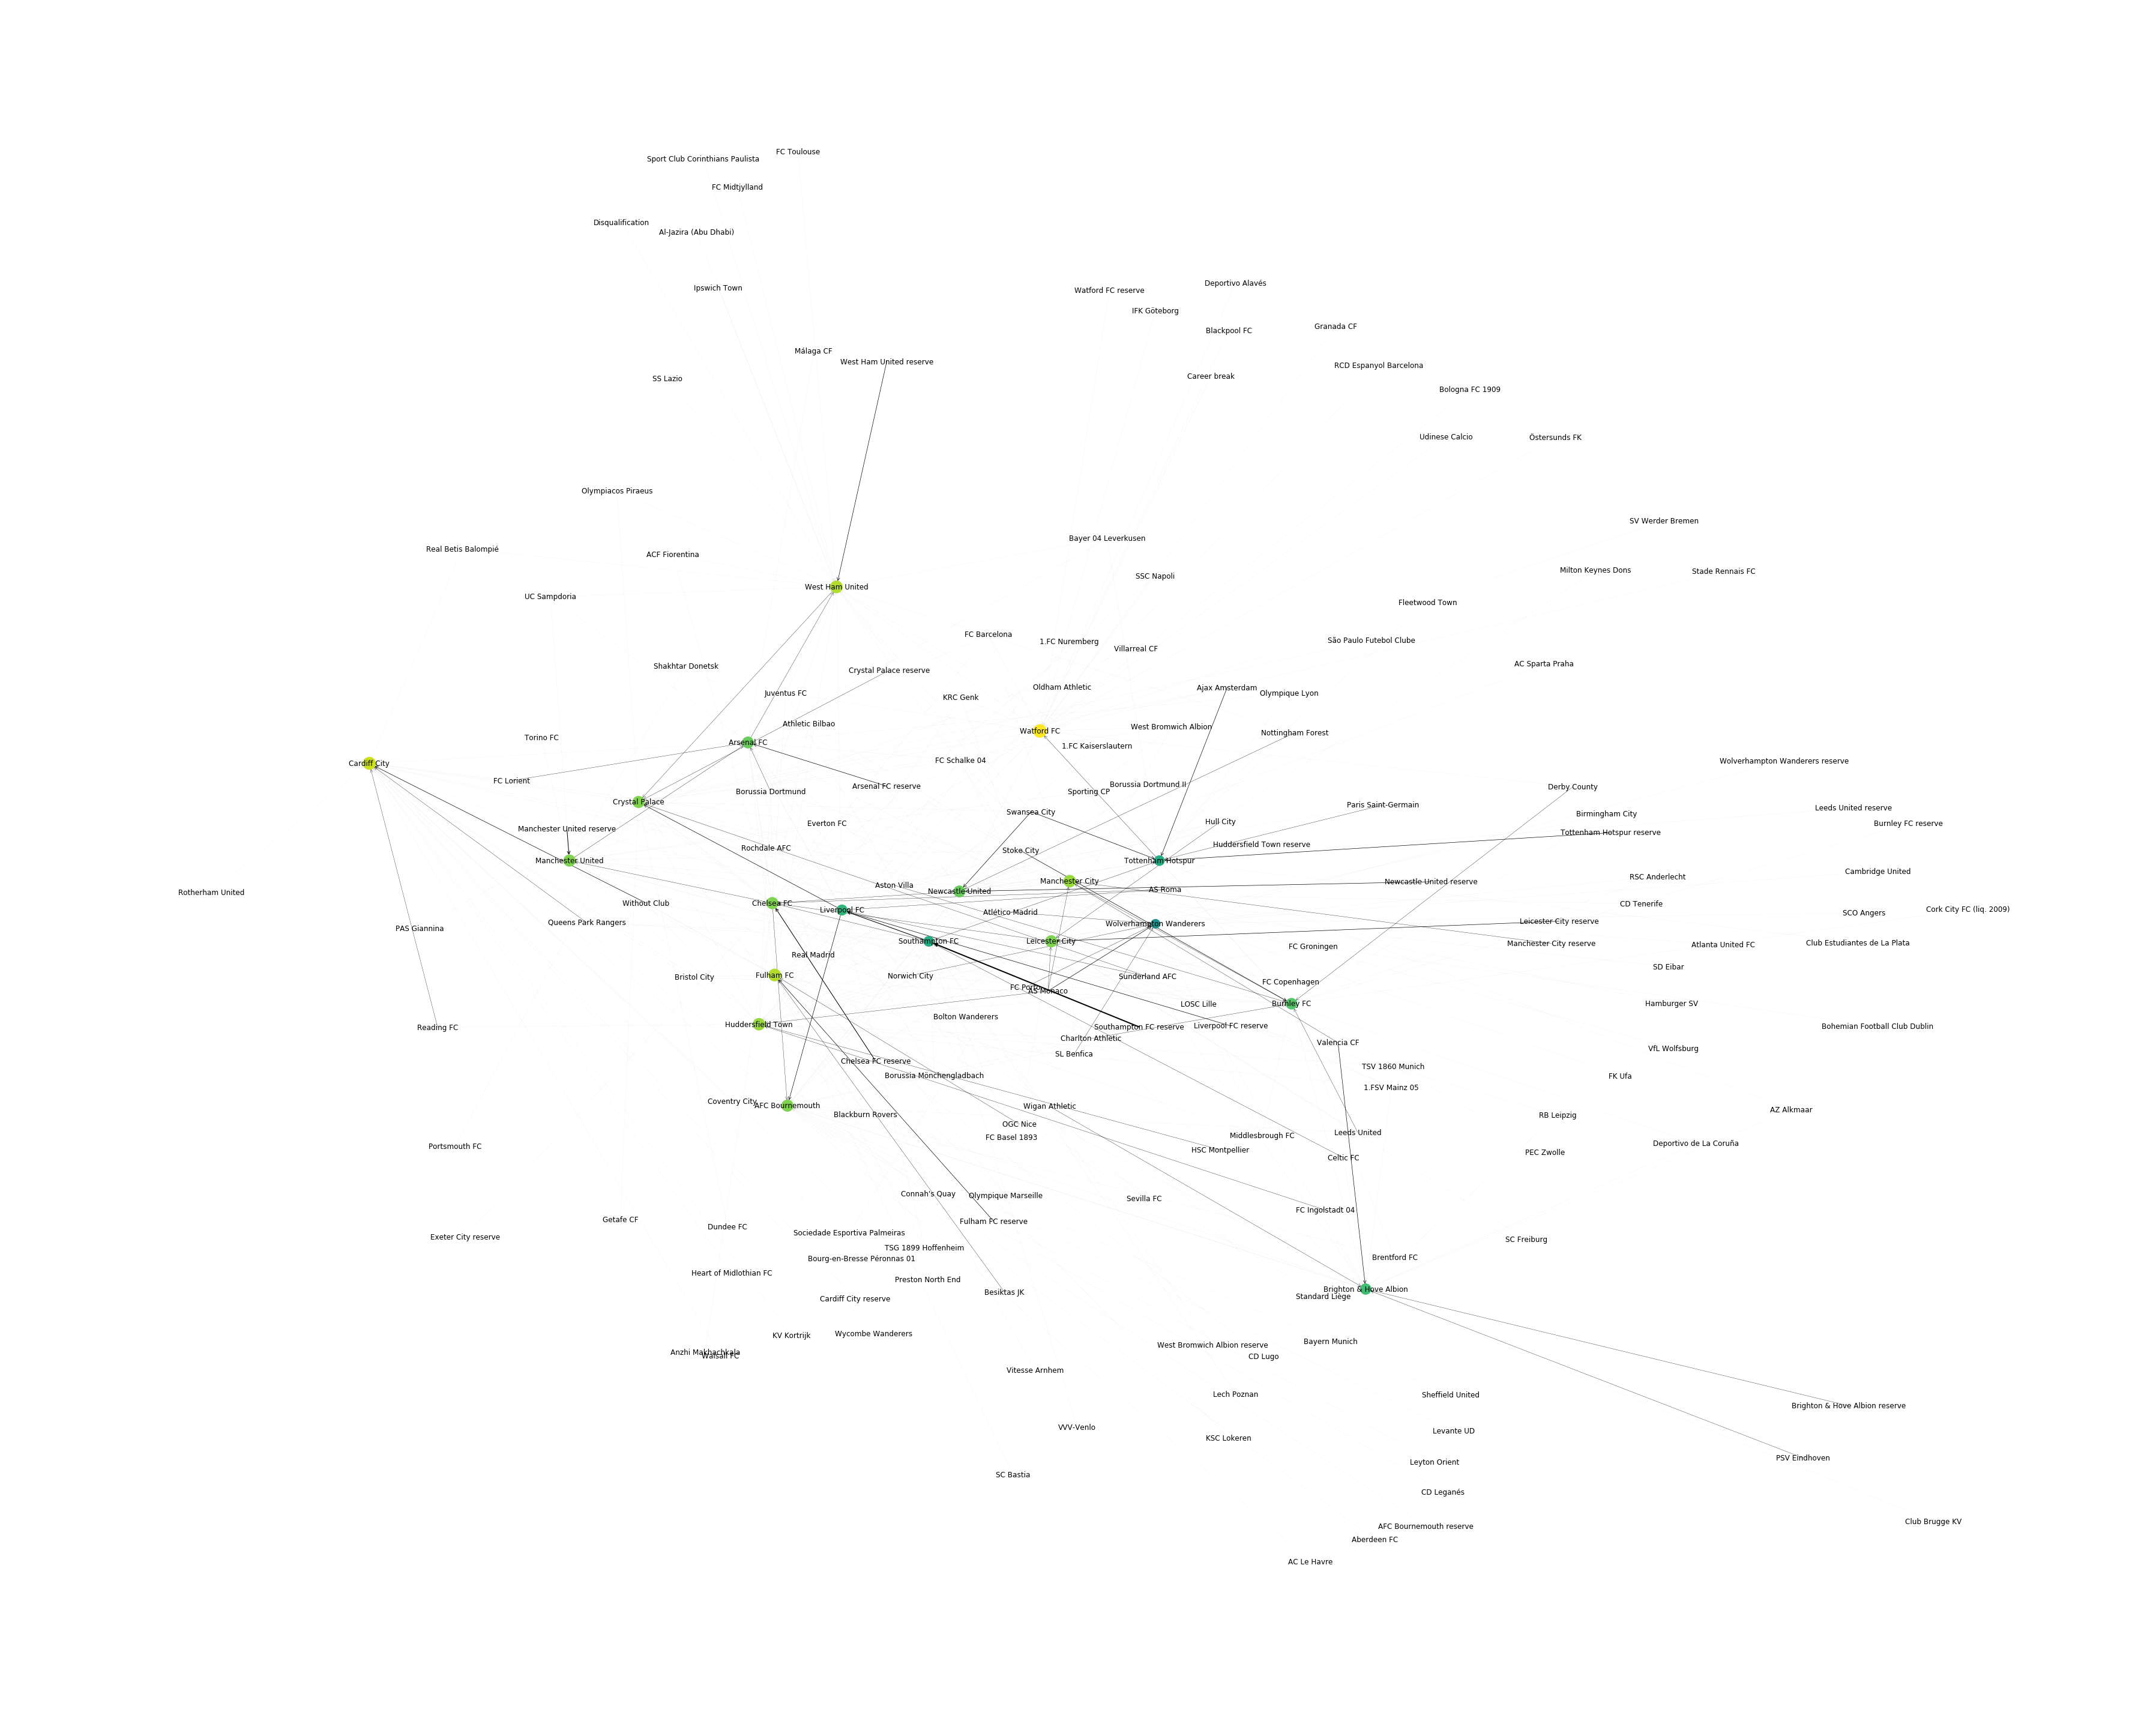

In [11]:
plt.figure(figsize=(50,40))
plt.subplot(1,1,1)
nx.draw(TF,node_size=[(i-0.5)*18 for i in nodesize], node_color=[(i-0.5)*30 for i in nodesize], width=[(i-0.94)/3 for i in edgewidth],
        arrowstyle='->',arrowsize=12,with_labels=True,fontsize=3,pos=nx.spring_layout(TF))
plt.tight_layout()
plt.savefig("transferin.png", format="PNG")

In [12]:
df3 = pivot_table(df, values='age', index=['current club'],aggfunc={'age': np.mean})
df3 = df3.sort_values(['age'],ascending=True)
age = df3['age'].tolist()
age1=[round(i,1) for i in age]
club =df3.index.tolist()

<BarContainer object of 19 artists>


(0.0, 30.611538461538462, -1.34, 19.340000000000003)

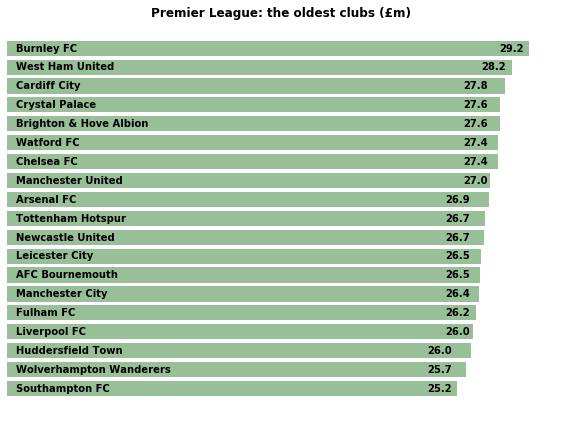

In [13]:
def autolabel(rects):
    for i,rect in enumerate(rects):
        width = int(rect.get_width())
        height = rect.get_height()
        xloc1 = width-1.5
        yloc1=rect.get_y() + height /2.0
        yloc2=rect.get_y() + height /2.0

        plt.text(xloc1,yloc1, '%s'% (age1[i]), verticalalignment="center", horizontalalignment='left', size=10, color='black', weight='bold', clip_on=True)
        plt.text(0.5,yloc2, '%s'% (club[i]), verticalalignment="center",horizontalalignment='left', size=10, color='black', weight='bold', clip_on=True)

age = df3['age'].tolist()
pos = df3.index.tolist()
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
rects = ax.barh(pos,age, align='center',height=0.8, color=(0.2, 0.5, 0.2, 0.5))
print(rects)
autolabel(rects)
plt.title('Premier League: the oldest clubs (£m)',size=12,weight='bold')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.axis('off')

In [14]:
nodesize = dict(TF.out_degree()).values()
edgewidth = [d['weight'] for (u,v,d) in TF.edges(data=True)]

In [19]:
dict(TF.out_degree())

{'SL Benfica': 3,
 'Manchester City': 7,
 'FC Barcelona': 4,
 'Manchester City reserve': 1,
 'Everton FC': 6,
 'Athletic Bilbao': 3,
 'Valencia CF': 3,
 'Hamburger SV': 1,
 'FC Porto': 5,
 'PEC Zwolle': 1,
 'AS Monaco': 7,
 'FK Ufa': 1,
 'Tottenham Hotspur': 4,
 'Real Madrid': 3,
 'Shakhtar Donetsk': 2,
 'Borussia Dortmund': 5,
 'Aston Villa': 6,
 'VfL Wolfsburg': 1,
 'FC Schalke 04': 5,
 'Liverpool FC': 7,
 'Leicester City': 4,
 'Atlético Madrid': 6,
 'Sociedade Esportiva Palmeiras': 1,
 'AS Roma': 4,
 'Sunderland AFC': 3,
 'Southampton FC': 4,
 'Charlton Athletic': 7,
 'Hull City': 5,
 'Sevilla FC': 2,
 'Liverpool FC reserve': 1,
 'RB Leipzig': 2,
 'Newcastle United': 6,
 'Arsenal FC': 5,
 'Stoke City': 5,
 'TSG 1899 Hoffenheim': 2,
 'Chelsea FC': 8,
 'LOSC Lille': 4,
 'Chelsea FC reserve': 1,
 'Huddersfield Town': 3,
 'Paris Saint-Germain': 2,
 'Bolton Wanderers': 3,
 'Exeter City reserve': 1,
 'ACF Fiorentina': 2,
 'Olympique Marseille': 2,
 'Torino FC': 2,
 'SSC Napoli': 2,
 'Vite

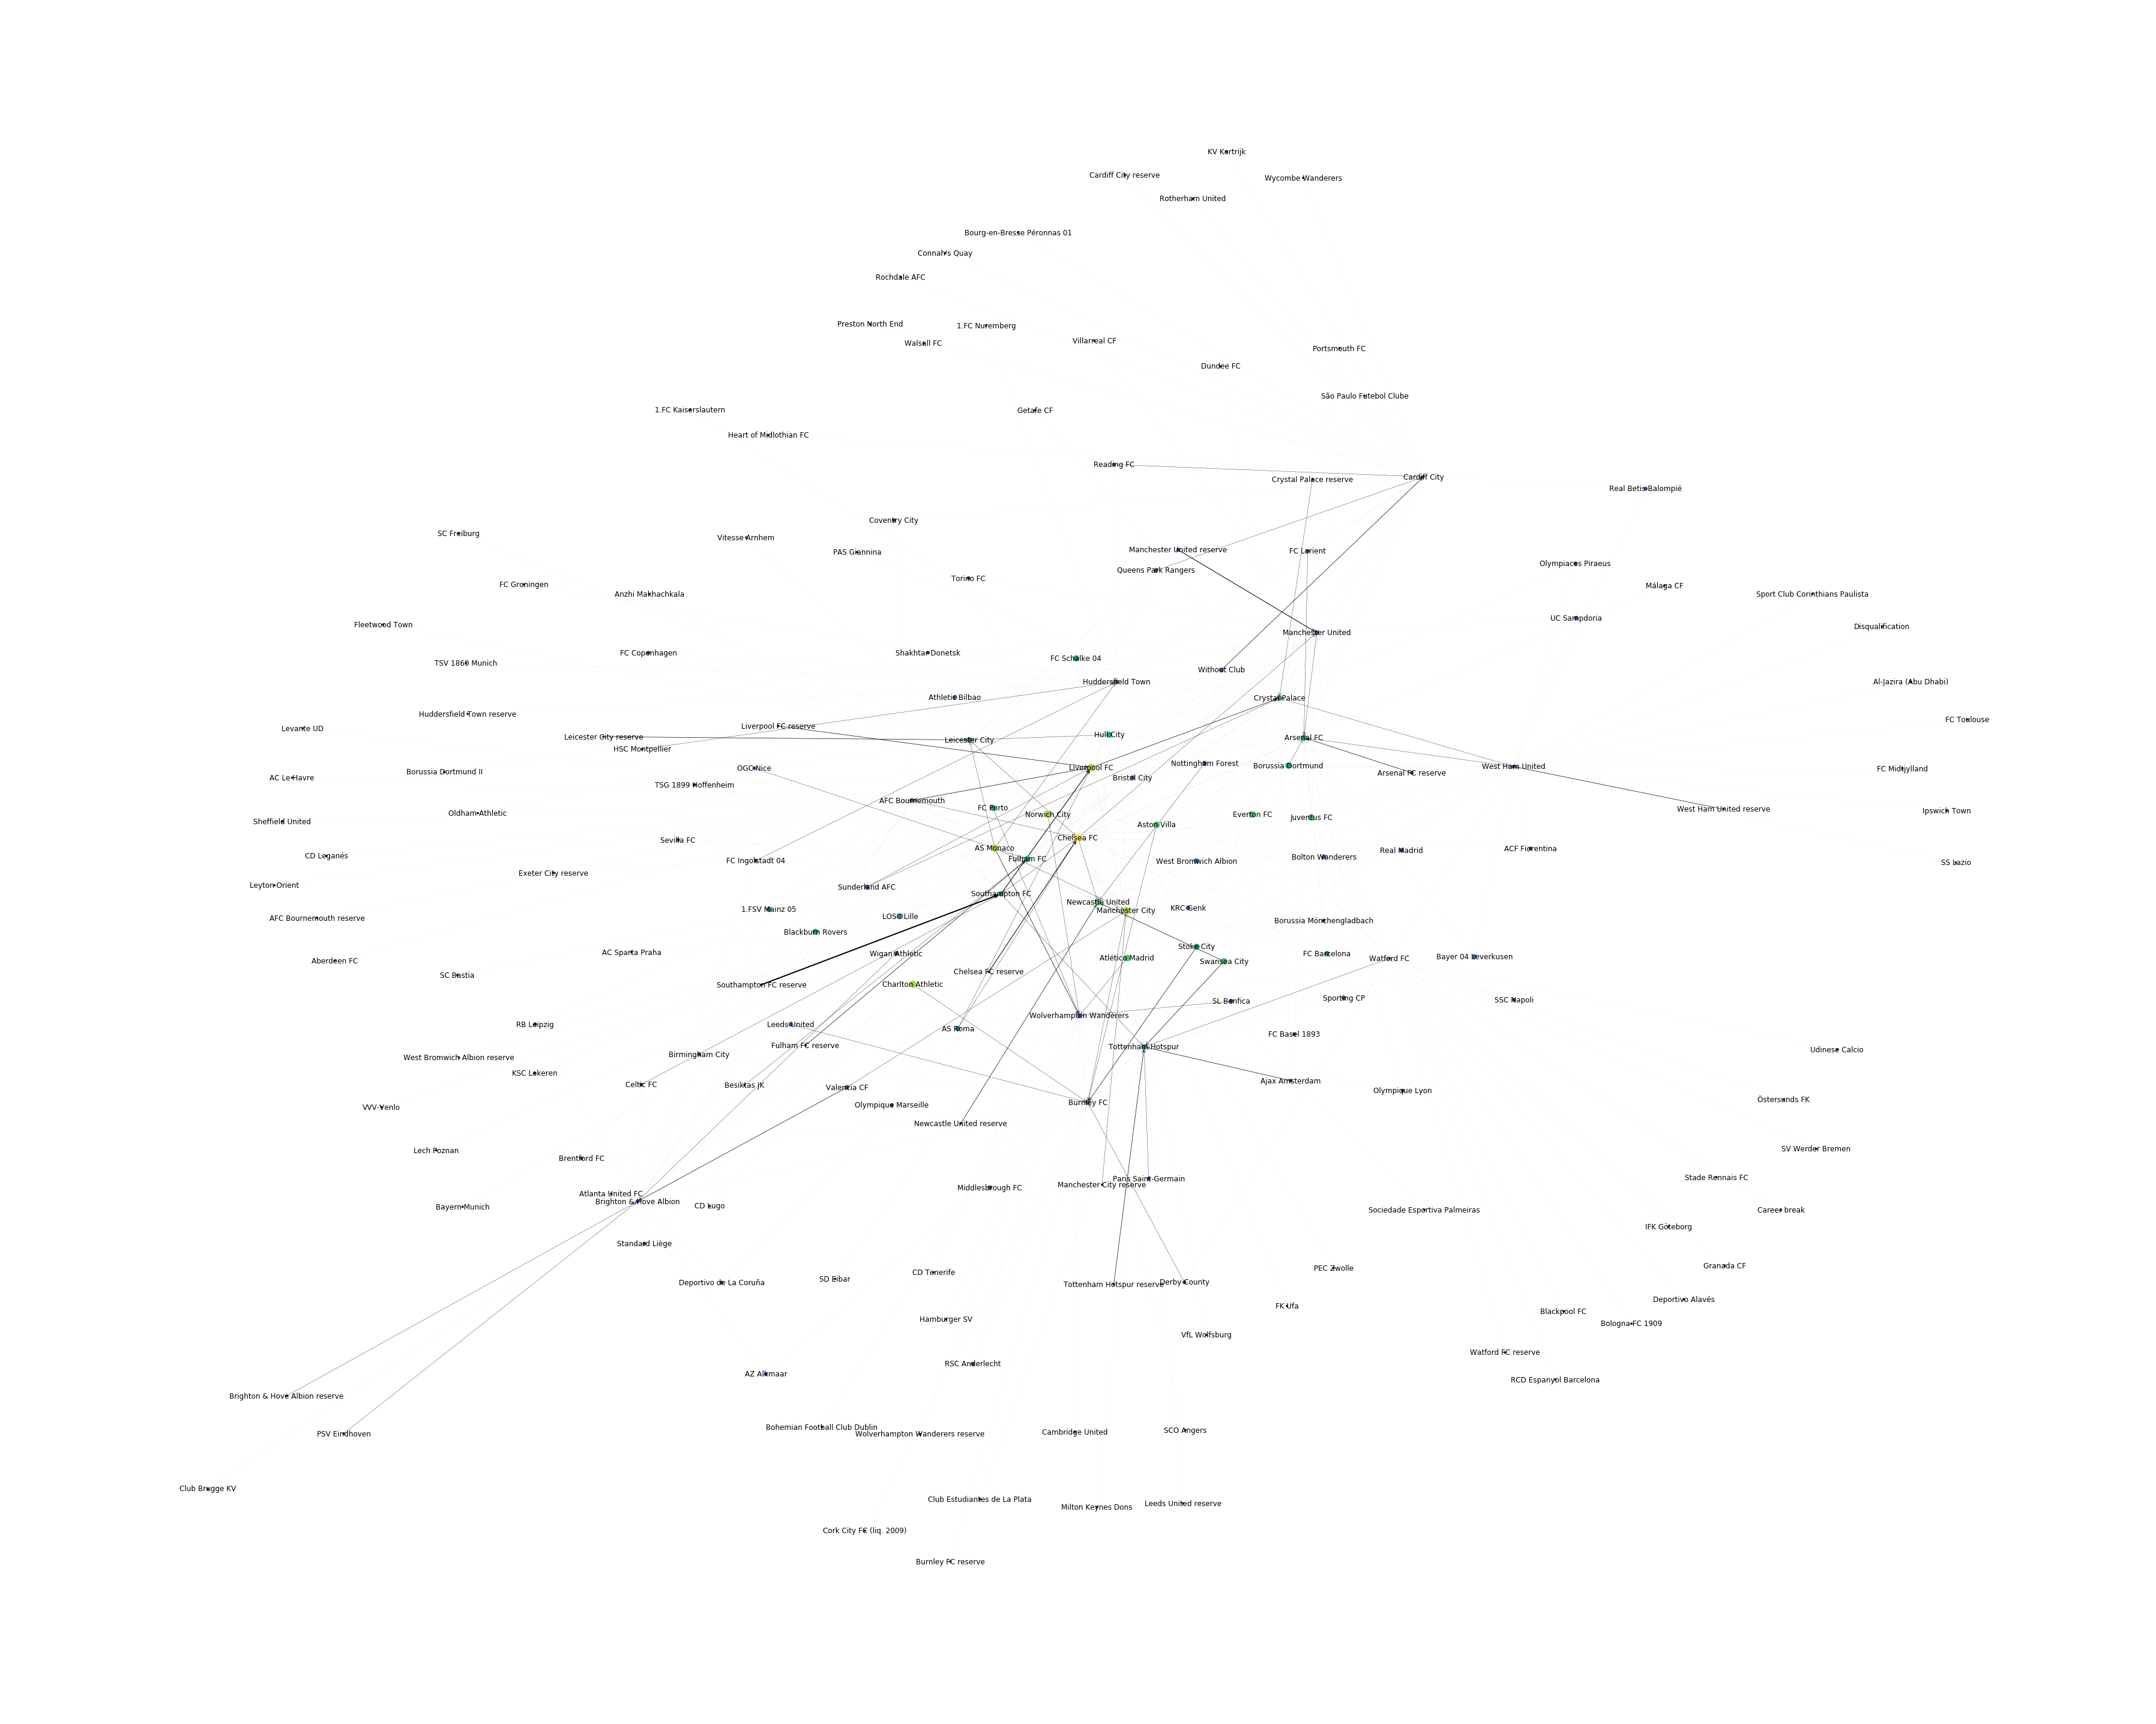

In [20]:
plt.figure(figsize=(50,40))
plt.subplot(1,1,1)
nx.draw(TF,node_size=[(i-0.5)*18 for i in nodesize], node_color=[(i-0.5)*30 for i in nodesize], width=[(i-0.94)/3 for i in edgewidth],
        arrowstyle='->',arrowsize=12,with_labels=True,fontsize=3,pos=nx.spring_layout(TF))
plt.tight_layout()
plt.savefig("transferout1.png", format="PNG")

In [36]:
che = df[df['signed from'] == 'Chelsea FC']
che = che.reset_index()

G=nx.DiGraph()
for i in range(len(che)):
    if (che['signed from'][i], che['current club'][i]) in G.edges():
        data = G.get_edge_data(che['signed from'][i], che['current club'][i])
        G.add_edge(che['signed from'][i], che['current club'][i], weight=data['weight']+1)
    else:
        G.add_edge(che['signed from'][i], che['current club'][i], weight=1)
print(G.edges(data=True))

[('Chelsea FC', 'Liverpool FC', {'weight': 1}), ('Chelsea FC', 'Manchester United', {'weight': 2}), ('Chelsea FC', 'Arsenal FC', {'weight': 1}), ('Chelsea FC', 'Crystal Palace', {'weight': 1}), ('Chelsea FC', 'AFC Bournemouth', {'weight': 2}), ('Chelsea FC', 'Southampton FC', {'weight': 2}), ('Chelsea FC', 'Newcastle United', {'weight': 2}), ('Chelsea FC', 'Watford FC', {'weight': 1})]


In [29]:
che = df[df['signed from'] == 'AS Monaco']
che = che.reset_index()

G=nx.DiGraph()
for i in range(len(che)):
    if (che['signed from'][i], che['current club'][i]) in G.edges():
        data = G.get_edge_data(che['signed from'][i], che['current club'][i])
        G.add_edge(che['signed from'][i], che['current club'][i], weight=data['weight']+1)
    else:
        G.add_edge(che['signed from'][i], che['current club'][i], weight=1)
print(G.edges(data=True))

[('AS Monaco', 'Manchester City', {'weight': 2}), ('AS Monaco', 'Liverpool FC', {'weight': 1}), ('AS Monaco', 'Manchester United', {'weight': 1}), ('AS Monaco', 'Leicester City', {'weight': 2}), ('AS Monaco', 'Wolverhampton Wanderers', {'weight': 3}), ('AS Monaco', 'Newcastle United', {'weight': 1}), ('AS Monaco', 'Huddersfield Town', {'weight': 2})]


In [34]:
che = df[df['signed from'] == 'Norwich City']
che = che.reset_index()

G=nx.DiGraph()
for i in range(len(che)):
    if (che['signed from'][i], che['current club'][i]) in G.edges():
        data = G.get_edge_data(che['signed from'][i], che['current club'][i])
        G.add_edge(che['signed from'][i], che['current club'][i], weight=data['weight']+1)
    else:
        G.add_edge(che['signed from'][i], che['current club'][i], weight=1)
print(G.edges(data=True))

[('Norwich City', 'Leicester City', {'weight': 1}), ('Norwich City', 'AFC Bournemouth', {'weight': 1}), ('Norwich City', 'Wolverhampton Wanderers', {'weight': 2}), ('Norwich City', 'Southampton FC', {'weight': 1}), ('Norwich City', 'Burnley FC', {'weight': 1}), ('Norwich City', 'Huddersfield Town', {'weight': 1}), ('Norwich City', 'Cardiff City', {'weight': 1})]


In [35]:
che

,index,current club,signed from,number,name,position,birth,age,nation,height,foot,join,contract,value
0,168,Leicester City,Norwich City,10,James Maddison,Attacking Midfield,"Nov 23, 1996",22,England,"1,75 m",right,"Jul 1, 2018",30.06.2023,£27.00m
1,240,AFC Bournemouth,Norwich City,6,Andrew Surman,Central Midfield,"Aug 20, 1986",32,England,"1,78 m",left,"Sep 1, 2014",30.06.2020,£2.25m
2,278,Wolverhampton Wanderers,Norwich City,21,John Ruddy,Goalkeeper,"Oct 24, 1986",32,England,"1,92 m",left,"Jul 10, 2017",30.06.2020,£2.70m
3,282,Wolverhampton Wanderers,Norwich City,5,Ryan Bennett,Centre-Back,"Mar 6, 1990",29,England,"1,88 m",right,"Jul 1, 2017",30.06.2021,£4.50m
4,312,Southampton FC,Norwich City,22,Nathan Redmond,Left Winger,"Mar 6, 1994",25,England,"1,73 m",right,"Jul 1, 2016",30.06.2021,£16.20m
5,390,Burnley FC,Norwich City,12,Robbie Brady,Left Midfield,"Jan 14, 1992",27,Ireland,"1,76 m",left,"Jan 31, 2017",30.06.2020,£7.20m
6,438,Huddersfield Town,Norwich City,21,Alex Pritchard,Attacking Midfield,"May 3, 1993",25,England,"1,68 m",right,"Jan 12, 2018",30.06.2021,£9.00m
7,468,Cardiff City,Norwich City,11,Josh Murphy,Left Winger,"Feb 24, 1995",24,England,"1,73 m",left,"Jul 1, 2018",30.06.2022,£7.20m


In [38]:
che = df[df['signed from'] == 'Manchester City']
che = che.reset_index()

G=nx.DiGraph()
for i in range(len(che)):
    if (che['signed from'][i], che['current club'][i]) in G.edges():
        data = G.get_edge_data(che['signed from'][i], che['current club'][i])
        G.add_edge(che['signed from'][i], che['current club'][i], weight=data['weight']+1)
    else:
        G.add_edge(che['signed from'][i], che['current club'][i], weight=1)
print(G.edges(data=True))

[('Manchester City', 'Liverpool FC', {'weight': 1}), ('Manchester City', 'Chelsea FC', {'weight': 1}), ('Manchester City', 'Leicester City', {'weight': 1}), ('Manchester City', 'West Ham United', {'weight': 1}), ('Manchester City', 'Southampton FC', {'weight': 1}), ('Manchester City', 'Burnley FC', {'weight': 2}), ('Manchester City', 'Huddersfield Town', {'weight': 1})]


In [39]:
che

,index,current club,signed from,number,name,position,birth,age,nation,height,foot,join,contract,value
0,39,Liverpool FC,Manchester City,7,James Milner,Central Midfield,"Jan 4, 1986",33,England,"1,75 m",right,"Jul 1, 2015",30.06.2019,£13.50m
1,50,Chelsea FC,Manchester City,13,Willy Caballero,Goalkeeper,"Sep 28, 1981",37,Argentina,"1,86 m",right,"Jul 1, 2017",30.06.2019,£900k
2,172,Leicester City,Manchester City,8,Kelechi Iheanacho,Centre-Forward,"Oct 3, 1996",22,Nigeria,"1,85 m",left,"Aug 3, 2017",30.06.2022,£13.50m
3,182,West Ham United,Manchester City,5,Pablo Zabaleta,Right-Back,"Jan 16, 1985",34,Argentina,"1,76 m",right,"Jul 1, 2017",30.06.2019,£3.60m
4,296,Southampton FC,Manchester City,28,Angus Gunn,Goalkeeper,"Jan 22, 1996",23,England,"1,96 m",right,"Jul 10, 2018",30.06.2023,£9.00m
5,374,Burnley FC,Manchester City,20,Joe Hart,Goalkeeper,"Apr 19, 1987",31,England,"1,96 m",right,"Aug 7, 2018",30.06.2020,£6.30m
6,380,Burnley FC,Manchester City,6,Ben Mee,Centre-Back,"Sep 21, 1989",29,England,"1,80 m",left,"Jan 17, 2012",30.06.2021,£9.00m
7,434,Huddersfield Town,Manchester City,10,Aaron Mooy,Central Midfield,"Sep 15, 1990",28,Australia,"1,79 m",right,"Jul 1, 2017",30.06.2020,£12.60m


In [33]:
che = df[df['signed from'] == 'Charlton Athletic']
che = che.reset_index()

G=nx.DiGraph()
for i in range(len(che)):
    if (che['signed from'][i], che['current club'][i]) in G.edges():
        data = G.get_edge_data(che['signed from'][i], che['current club'][i])
        G.add_edge(che['signed from'][i], che['current club'][i], weight=data['weight']+1)
    else:
        G.add_edge(che['signed from'][i], che['current club'][i], weight=1)
print(G.edges(data=True))

[('Charlton Athletic', 'Liverpool FC', {'weight': 1}), ('Charlton Athletic', 'Arsenal FC', {'weight': 1}), ('Charlton Athletic', 'AFC Bournemouth', {'weight': 1}), ('Charlton Athletic', 'Newcastle United', {'weight': 1}), ('Charlton Athletic', 'Burnley FC', {'weight': 2}), ('Charlton Athletic', 'Brighton & Hove Albion', {'weight': 1}), ('Charlton Athletic', 'Huddersfield Town', {'weight': 1})]
